In [1]:
import pairTrade
from pairTrade import pairTrade
import pandas as pd
import warnings
import pandas.util.testing as tm
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.tsa.stattools as ts 
import statsmodels.formula.api as sm
warnings.filterwarnings('ignore')

In [2]:
symbols = pd.read_csv(f"/Users/jochien/Documents/MaxRereach/stat-JOJO/future/1D/symbols.csv").symbol.tolist()
df = ((pd.concat([pd.read_csv(f"/Users/jochien/Documents/MaxRereach/stat-JOJO/future/1D/{symbol}.csv", index_col='date', parse_dates=True)
        ['close'].rename(symbol)for symbol in symbols],axis=1,sort=True)))
df = df.loc[:,~df.columns.duplicated()]

In [3]:
df

,BTCUSDT,ETHUSDT,BCHUSDT,XRPUSDT,EOSUSDT,LTCUSDT,TRXUSDT,ETCUSDT,LINKUSDT,XLMUSDT,...,API3USDT,GMTUSDT,APEUSDT,BNXUSDT,WOOUSDT,FTTUSDT,JASMYUSDT,DARUSDT,GALUSDT,OPUSDT
date,,,,,,,,,,,,,,,,,,,,,
2021-06-08 08:00:00,33372.58000000,2506.19000000,595.10000000,0.87330000,5.05000000,160.60000000,0.07233000,56.66800000,24.07900000,0.34939000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-09 08:00:00,37368.45000000,2610.20000000,633.77000000,0.92180000,5.33800000,172.47000000,0.07530000,62.26800000,25.58700000,0.36541000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-10 08:00:00,36669.66000000,2471.11000000,601.33000000,0.86920000,5.07900000,168.08000000,0.07253000,57.84900000,23.11900000,0.33889000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-11 08:00:00,37300.42000000,2354.25000000,576.88000000,0.84710000,4.91500000,162.79000000,0.06915000,56.83100000,21.46700000,0.31806000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-12 08:00:00,35537.05000000,2370.59000000,579.70000000,0.83260000,4.82900000,161.75000000,0.06802000,55.19300000,21.65000000,0.32785000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 08:00:00,29682.80000000,1774.15000000,182.92000000,0.39010000,1.26300000,62.58000000,0.08104000,21.83300000,6.85000000,0.14602000,...,1.50100000,1.01110000,6.12600000,118.96000000,0.15273000,25.95900000,0.01204000,0.41400000,4.35160000,1.36150000
2022-06-04 08:00:00,29848.40000000,1803.71000000,188.61000000,0.39230000,1.28400000,63.71000000,0.08037000,21.95600000,7.40600000,0.14336000,...,1.49200000,0.99760000,6.19300000,119.00000000,0.16041000,25.96300000,0.01217000,0.42880000,4.39810000,1.39210000
2022-06-05 08:00:00,29909.90000000,1805.39000000,179.81000000,0.39510000,1.26800000,63.10000000,0.08143000,21.80300000,7.64200000,0.14338000,...,1.50700000,0.93500000,6.09500000,121.16000000,0.16102000,26.13000000,0.01212000,0.42120000,4.35490000,1.16540000


In [ ]:
symbols = pd.read_csv(f"/Users/jochien/Documents/MaxRereach/backtrading/future/1D/symbols.csv").symbol.tolist()
df = ((pd.concat([pd.read_csv("/Users/jochien/Documents/MaxRereach/backtrading/future/1D/{symbol}.csv", index_col='date', parse_dates=True)
        ['close'].rename(symbol)for symbol in symbols],axis=1,sort=True)))
df = df.loc[:,~df.columns.duplicated()]

In [1]:
import pairTrade
from pairTrade import pairTrade
import pandas as pd
import warnings
import pandas.util.testing as tm
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.tsa.stattools as ts 
import statsmodels.formula.api as sm
warnings.filterwarnings('ignore')

## plot
### 外部顯示
# %matplotlib qt 
### 內部
%matplotlib inline 
plt.figure(figsize = (20,20))

symbols = pd.read_csv(f"/Users/jochien/Documents/MaxRereach/backtrading/future/1D/symbols.csv").symbol.tolist()
df = ((pd.concat([pd.read_csv(f"/Users/jochien/Documents/MaxRereach/backtrading/future/1D/{symbol}.csv", index_col='date', parse_dates=True)
        ['close'].rename(symbol)for symbol in symbols],axis=1,sort=True)))
df = df.loc[:,~df.columns.duplicated()]

<Figure size 1440x1440 with 0 Axes>

# pair selection

In [ ]:
### 波動度
def volatilityFiliter(df, tradeType, threshold = None, rolling = 20, plot = True):
    """
        Args:
            df (dataframe): raw data 
            tradeType (string): priceSpread, priceRatio, returnSpread, regression. 
            threshold (int):  
            rolling (int):  
    """
    tempList = []
    for A_symbol in df.columns:
        for B_symbol in df.columns:
            if A_symbol != B_symbol:
                if tradeType == 'priceSpread':
                    para = df[A_symbol] - df[B_symbol]
                elif tradeType == 'priceRatio':
                    para = df[A_symbol]/df[B_symbol]
                elif tradeType == 'returnSpread':
                    A_return = df[A_symbol].pct_change()
                    B_return = df[B_symbol].pct_change()
                    para = A_return - B_return
                elif tradeType == 'regression':
                    hedgeRatio=np.full(self.df.shape[0], 0.0)
                    for t in np.arange(self.rolling, len(hedgeRatio)):
                        regress_results=sm.ols(formula="{} ~ {}".format(A_Symbol, B_Symbol), data = df[(t-rolling):t]).fit() # Note this can deal with NaN in top row
                        hedgeRatio[t-1]=regress_results.params[1] ## beta1
                        para = df[A_symbol] - hedgeRatio * df[B_symbol]        
                zscore = (para-para.mean())/para.std()
                signal = ((zscore.shift(1)>0) & (zscore<=0)) | ((zscore.shift(1)<=0) & (zscore>0))
                num = len(signal[signal])
                tempList.append([A_symbol, B_symbol, num])
    result = pd.DataFrame(tempList, columns=['A_symbol', 'B_symbol', 'num']).sort_values('num').reset_index(drop=True)
    print('[average volatility] :', result['num'].mean())
    resultPivot = result.pivot("A_symbol", "B_symbol", "num")
    if plot:
        sns.heatmap(resultPivot, annot = True, xticklabels=1, yticklabels=1)
    if threshold is not None:
        resultFiliter = result[result['num'] >= threshold].reset_index(drop=True)
        return [resultFiliter['A_symbol'][i] + '_' + resultFiliter['B_symbol'][i] for i in range(resultFiliter.shape[0])]
        

## 相關性        
def correlation(df, threshold = None, plot = True):
    result = df.corr(method ='pearson')
    if plot:
        sns.heatmap(df.corr(), annot = True, xticklabels=1, yticklabels=1)

    if threshold is not None:
        resultFiliter = []
        for A_symbol in result.columns:
            for B_symbol in result.columns:
                if result.loc[A_symbol, B_symbol] >= threshold and A_symbol != B_symbol:
                    resultFiliter.append(A_symbol + '_' + B_symbol)
                    
    return resultFiliter

def minimum(df, threshold = None, plot = True):
    tempList = []
    for A_symbol in df.columns:
        for B_symbol in df.columns:
            if A_symbol != B_symbol:
                A_zscore = (df[A_symbol]-df[A_symbol].mean())/df[A_symbol].std()
                B_zscore = (df[B_symbol]-df[B_symbol].mean())/df[B_symbol].std()
                num = ((A_zscore-B_zscore)**2).sum()
                tempList.append([A_symbol, B_symbol, num])
    result = pd.DataFrame(tempList, columns=['A_symbol', 'B_symbol', 'num']).sort_values('num').reset_index(drop=True)
    print('[average minimum] :', result['num'].mean())
    resultPivot = result.pivot("A_symbol", "B_symbol", "num")
    if plot:
        sns.heatmap(resultPivot, annot = True, xticklabels=1, yticklabels=1)
    if threshold is not None:
        resultFiliter = result[result['num'] >= threshold].reset_index(drop=True)
        return [resultFiliter['A_symbol'][i] + '_' + resultFiliter['B_symbol'][i] for i in range(resultFiliter.shape[0])]

def cointegration(df, threshold = None,  plot = True):
    tempList = []
    for A_symbol in df.columns:
        for B_symbol in df.columns:
            if A_symbol != B_symbol:
                coin = ts.coint(df[A_symbol], df[B_symbol])
                tempList.append([A_symbol, B_symbol, coin[1]])
    result = pd.DataFrame(tempList, columns=['A_symbol', 'B_symbol', 'num']).sort_values('num').reset_index(drop=True)
    print('[average minimum] :', result['num'].mean())
    resultPivot = result.pivot("A_symbol", "B_symbol", "num")
    if plot:
        sns.heatmap(resultPivot, annot = True, xticklabels=1, yticklabels=1)
    if threshold is not None:
        resultFiliter = result[result['num'] < threshold].reset_index(drop=True)
        print(resultFiliter)
        return [resultFiliter['A_symbol'][i] + '_' + resultFiliter['B_symbol'][i] for i in range(resultFiliter.shape[0])]

In [ ]:
vol = volatilityFiliter(df, 'priceRatio', threshold = 40, plot = False)
corr = correlation(df, 0.6, plot = False)
mini = minimum(df, 0.6, plot = False)
coin = cointegration(df, 0.05, plot = False)


interSection = list(set(vol) & set(corr) & set(mini) & set(coin))

print("[vol]", len(vol))
print("[corr]", len(corr))
print("[mini]", len(mini))
print("[coin]", len(coin))
print("[interSection]", len(interSection))

In [ ]:
totalPNL.index = df.index

In [ ]:
totalPNL = pd.DataFrame()
totalPNL.index = df.index
temp = 0
for i in interSection:
    A_symbol, B_symbol = i.split('_', 1 )[0], i.split('_', 1 )[1]
    df1 = df[[A_symbol, B_symbol]]
    ratio = pairTrade(df1)
    ratio.indicator(tradeType = 'priceRatio')
    ratio.strategy(strategyType = 'convergence', actionType = 'amount', entry = 1, exit = 0.2, stopLossType = 'trailingStop', trailingProfitTaking = 0.1, trailingStoploss = 0.05)
    totalPNL[i] = ratio.df['total']
    temp += 100000
#     ratio.pplot()
totalPNL['total'] = totalPNL.sum(axis = 1)

plt.figure(figsize = (15,10))
date = totalPNL.index
total = totalPNL['total']
plt.plot(date, total, color = 'b')
plt.ticklabel_format(axis="y", style="plain")
plt.ylabel("equity curve")

In [ ]:
norm_prices = df.divide(df.iloc[0])

plt.figure(figsize = (15, 10))
plt.plot(norm_prices)
plt.xlabel('days')
plt.title('Performance of cryptocurrencies')
plt.legend(symbols)
plt.show()

result_list = []
for a1 in df.columns:
    for a2 in df.columns:
        if a1 != a2:
            test_result = ts.coint(df[a1], df[a2])
            if test_result[1] < 0.05:
                print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))
                result_list.append((a1, a2, test_result[1]))

In [ ]:
len(result_list)

* tradeType(priceRatio, priceSpread, returnSpread, priceRegression)
* strategyType: convergence 收斂策略, divergence 發散策略
* actionType: amount等金額購買, unit依比例購買
* entry 進場條件
* exit 出場條件
* signalStopLoss Defaults is None
* stopLoss 訊號停損
* singalStopLoss{固定停利停損 : fixedStopLoss, 移動停利停損 : trailingStop, 時間停利停損 : timeStop} 
* stopLossPara 停損參數 : fixedStopLoss 固定停利停損點位, trailingStop 移動停利停損點位, timeStop 時間停利停損時間間隔

# Ratio

### singal stoploss

BTCUSDT_ETHUSDT 回測結果
-----------------------------BTCUSDT-ETHUSDT--------------------------
初始價格 100000
總損益:  20888.13531532
總交易次數:  31
平均損益:  673.8108166230705
勝率:  0.4838709677419355
獲利因子:  1.3844015950231914
賺賠比:  1.4766950346914038
最大資金回落:  24772.91787422326
夏普比率:  0.10783704858745177
年化報酬率:  1.3806558797280835e+60


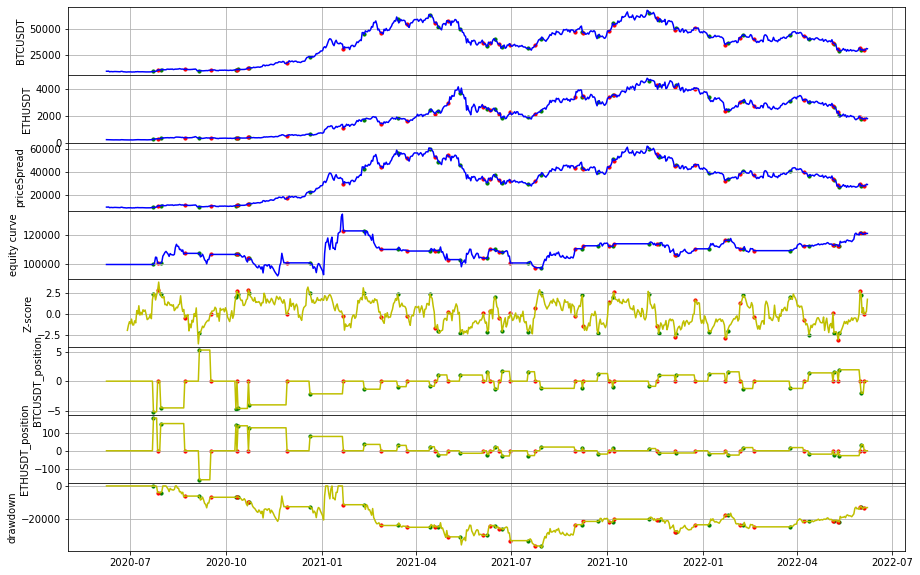

In [5]:
# for i in result_list[:1]:
# df1 = df[[i[0], i[1]]]
df1 = df[['BTCUSDT', 'ETHUSDT']]
A = pairTrade(df1)
A.indicator(tradeType = 'priceSpread')
A.strategy(strategyType = 'convergence', actionType = 'amount', entry = 2, exit = 0, signalStopLoss = 2.5)
A.pplot()

### stopLoss (fixedProfitTaking)